In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('salary.csv').dropna() 

##### [Comment]
* Always best to first check what missing values are? How many values are missing? What the effect of droping them is? Example is the df.isnull().any() method to avoid unnecessary pre-processing
* At least justify why you picked the dropna() method over other 'missing value' treatment like "replacing with average value" is the best way to handle missing data. This is important to avoid losing samples with important information
* After checking the NaN values, always good to be specific on how you want your drop.na(axis=?) to work to avoid losing important columns
* It's good practice to also show/check that your drop.na() method worked by using methods like df.describe() before and after each data cleaning step


In [61]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


##### [Comment]
* What information did we gain from the correlation matrix? Why was it performed?
* What decision does this help you make for next steps? 

In [62]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [63]:
#df = df.drop(['exprior','degree','otherqual','yearsabs'], axis =1)

##### [Comment]
* Get rid of unnecessary code

In [64]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=10)

### 1.Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

##### [Comment]
* Always assume your reader knows little about what you are doing, and walk them through the code and justify each step as you go along
* Case in point: your header here tells me I will see "scatterplots, histograms, and a descriptive statistics". It is not clear what I am looking at as the code progresses, what the findings/key takeaways are from each plot
* What decisions were made based on these findings
* THE CODE DOES NOT TELL A STORY

In [65]:
train.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,410.00000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,49984.68689,2.858537,12.353659,6.743902,0.941902,0.960976,0.034146,2.082927,0.736585,2.558537,6.973171
std,12455.34791,4.638469,9.464865,6.315292,0.146044,0.193890,0.181827,0.832089,0.441024,1.120050,16.910284
min,29000.00000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,39583.25000,0.000000,3.250000,2.000000,0.840000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,48268.50000,1.000000,10.500000,4.000000,0.910000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,59767.25000,4.000000,21.000000,11.000000,1.000000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,90082.00000,25.000000,35.000000,25.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


### Visualizations

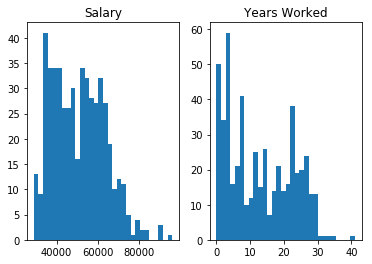

In [66]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.hist(df['salary'], bins=30)
plt.title('Salary')

plt.subplot(1, 2, 2)
plt.hist(df['yearsworked'], bins=30)
plt.title('Years Worked')

plt.show()

##### [Comment]
* What are the axis?

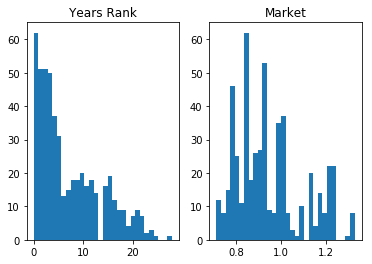

In [67]:
plt.subplot(1, 2, 1)
plt.hist(df['yearsrank'], bins=30)
plt.title('Years Rank')

plt.subplot(1, 2, 2)
plt.hist(df['market'], bins=30)
plt.title('Market')

plt.show()

##### [Comment]
* What are the axis?
* What does the market plot show us? What are you plotting agaist?

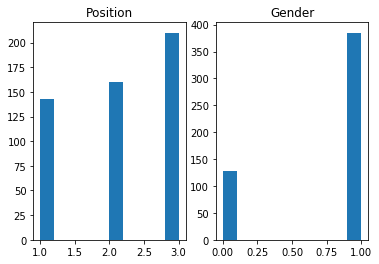

In [68]:
plt.subplot(1, 2, 1)
plt.hist(df['position'])
plt.title('Position')

plt.subplot(1, 2, 2)
plt.hist(df['male'])
plt.title('Gender')

plt.show()

##### [Comment]
* What are the axis?
* What are the positions or the genders? Adding labels and legends to the plots might help

Text(0.5,1,'Field')

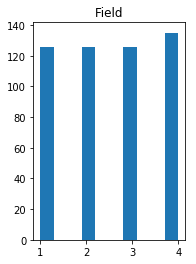

In [69]:
plt.subplot(1, 2, 1)
plt.hist(df['Field'])
plt.title('Field')


##### [Comment]
* What are the axis?
* What do the values '1,2,3,4' represent?

Text(0.5,1,'salary & year rank')

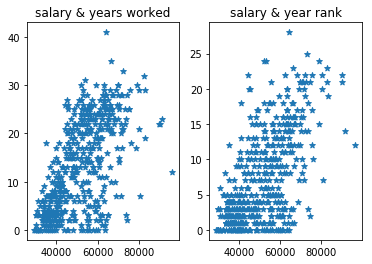

In [70]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['yearsworked'], marker='*')
plt.title('salary & years worked')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['yearsrank'], marker='*')
plt.title('salary & year rank')

##### [Comment]
* Why use multiple subplots here? It would be neater to use one 3,2,p subplot? 
* What was the intention of this plot? Relationship of years worked vs salary? What is the dependent & independent variable in that case? I would've expected 'yearsworked' to be the independent variable (x-axis) 
* What are the axis?
* Plot indistinguishable
* Using different markers can also help differentiate the plots (especially when presented together like this) 
* What are the positions or the genders? Adding labels and legends to the plots might help

Text(0.5,1,'salary & position')

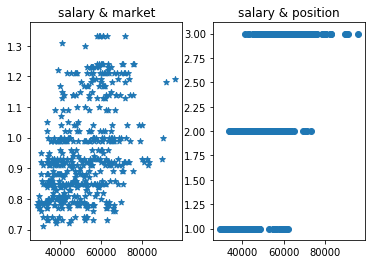

In [71]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['market'], marker='*')
plt.title('salary & market')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['position'])
plt.title('salary & position')

##### [Comment]
* Usually, the independent variable (variable that won't change) goes on the x-axis to show what the dependent variable (I would think salary in this case) being tested against the other variables. Mixing these can confuse the reader's understanding of your experiment
* What are the axis?
* Using different markers can also help differentiate the plots (especially when presented together like this) 
* What are the positions or the genders? Adding labels and legends to the plots might help

Text(0.5,1,'salary & field')

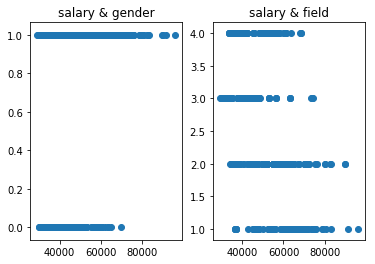

In [72]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['male'])
plt.title('salary & gender')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['Field'])
plt.title('salary & field')

### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [73]:
dummies = pd.get_dummies(train['Field'])
dummies.head()

,1,2,3,4
175,0,1,0,0
456,0,1,0,0
174,0,1,0,0
50,0,0,0,1
392,0,0,1,0


##### [Comment]
* Method works, but this transformation is not used to develop the model
* Aren't the 'Field' variables already numerical?

### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

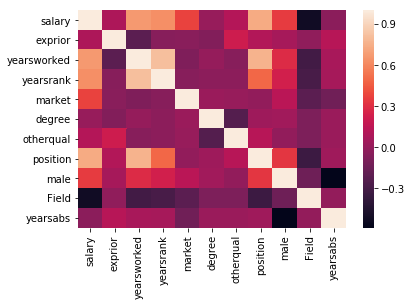

In [74]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##### [Comment]
* What are the findings or conclusions from the correlation matrix?
* Is there more than one variable that strongly influences salary? 
* What correlation threshold did you use to make this determination?

### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [75]:
X = train[['yearsworked', 'yearsrank','market','position','male','Field']]

y = train['salary']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#model.summary()

##### [Comment]
* Why were only these variables used?
* Code copied and pasted from https://blog.datarobot.com/multiple-regression-using-statsmodels with 'TV and Radio' variables NOT in current data set

### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [76]:
standardized_residuals = model.resid
standardised_predicted_values = model.fittedvalues

print(standardized_residuals.head())
print(standardised_predicted_values.head())

175    6781.386490
456   -8910.287331
174      55.943115
50     -802.656472
392   -1489.085069
dtype: float64
175    49470.613510
456    47482.287331
174    50782.056885
50     42890.656472
392    32489.085069
dtype: float64


##### Comment]

* Not clear what the output is. Better to write to seperate lines of code and print seperately for ease of reading and to avoid confusion

### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

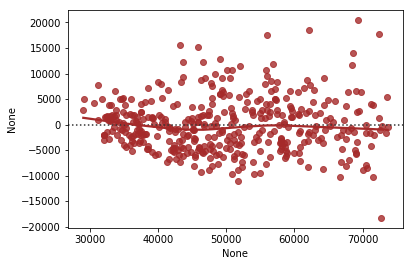

In [77]:
sns.residplot(standardised_predicted_values, standardized_residuals, lowess=True, color="brown")

##### [Comment]
* Interpret results
* What does this tell us about the performance of the model?

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

##### [Comment]
* Delete headers with no content